In [0]:
import io
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from google.colab import files
import seaborn as sns
sns.set()

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving 2506_t-mt.TXT to 2506_t-mt.TXT


In [0]:
#data0 = pd.read_csv(io.BytesIO(uploaded['2506_tdo.txt']),sep='\t',header=None,names = ['tiempo', 's1','s2','s3','s4'])
data3 = pd.read_csv('2506_t-mt.TXT',sep='\t',header=None,names = ['tiempo', 's1','s2','s3','s4'])
#data0 = pd.read_csv('2506_ttj.TXT',sep='\t',header=None,names = ['tiempo', 's1','s2','s3','s4']) #debería tener 3 renglones vacíos
#data1 = pd.read_csv('2606_m.txt',sep='\t',header=None,names = ['tiempo', 's1','s2','s3','s4'])
#data2 = pd.read_csv('2606_t.txt',sep='\t',header=None,names = ['tiempo', 's1','s2','s3','s4'])

# Dataset is now stored in a Pandas Dataframe

In [2]:
data3 = np.genfromtxt('2506_t-mt.TXT')#, delimiter='\t')
"""
data3[:,0] #Tiempo
data3[:,1] #Voltaje S1
data3[:,2] #Voltaje S2
data3[:,3] #Voltaje S3
data3[:,4] #Voltaje S4
"""


'\ndata3[:,0] #Tiempo\ndata3[:,1] #Voltaje S1\ndata3[:,2] #Voltaje S2\ndata3[:,3] #Voltaje S3\ndata3[:,4] #Voltaje S4\n'

In [0]:
martes_t1 = data3[32:1542,:]
martes_t2 = data3[1542:3831,:]
miercoles_m1 = data3[3831:3957,:]
miercoles_m2 = data3[3957:12917,:]
miercoles_t1 = data3[12917:12971,:]
miercoles_t2 = data3[12971:23801,:]
otras1 = data3[23801:23848,:]
otras2 = data3[23848:,:]

In [0]:
len(martes_t2[:,0])

2289

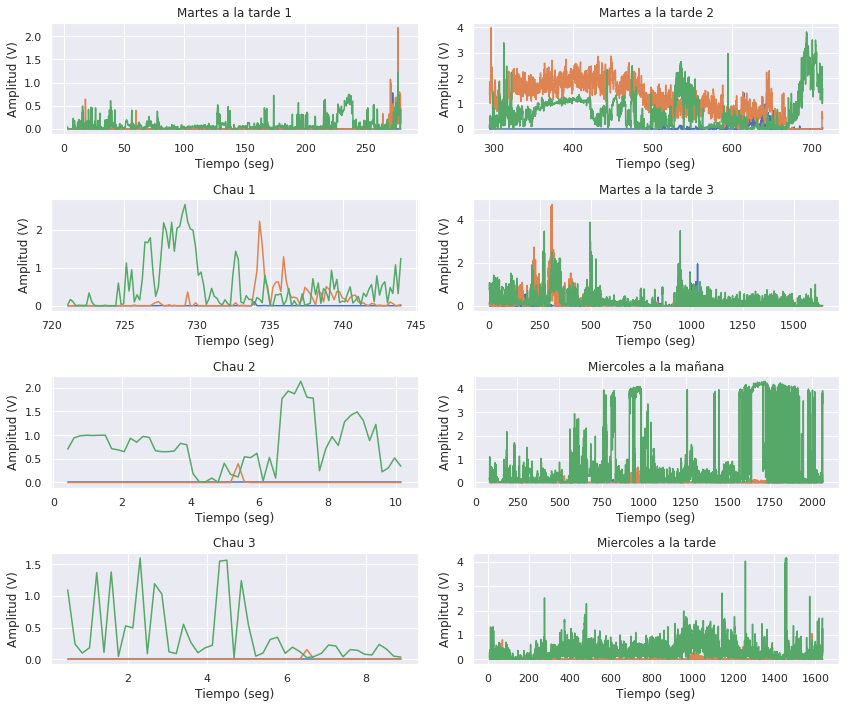

In [4]:
plt.figure(figsize=(12,10))

plt.subplot(421)
for i in range(3):
  plt.plot(martes_t1[:,0]/1000, martes_t1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 1')
  plt.grid()
  
plt.subplot(422)
for i in range(3):
  plt.plot(martes_t2[:,0]/1000, martes_t2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 2')
  plt.grid()
  
plt.subplot(423)
for i in range(3):
  plt.plot(miercoles_m1[:,0]/1000, miercoles_m1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Chau 1')
  plt.grid()
  
plt.subplot(424)
for i in range(3):
  plt.plot(miercoles_m2[:,0]/1000, miercoles_m2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 3')
  plt.grid()
  
plt.subplot(425)
for i in range(3):
  plt.plot(miercoles_t1[:,0]/1000, miercoles_t1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Chau 2')
  plt.grid()
  
plt.subplot(426)
for i in range(3):
  plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Miercoles a la mañana')
  plt.grid()
  
plt.subplot(427)
for i in range(3):
  plt.plot(otras1[:,0]/1000, otras1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Chau 3')
  plt.grid()
  
plt.subplot(428)
for i in range(3):
  plt.plot(otras2[:,0]/1000, otras2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Miercoles a la tarde')
  
plt.tight_layout()
plt.grid()
plt.show()

In [0]:
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

def prediccion(parametros,covarianza):
  fuerza=np.arange(0,50,0.005)
  err_f=0.05
  yp,sigma_yp,U,L=np.zeros(len(fuerza)),np.zeros(len(fuerza)),np.zeros(len(fuerza)),np.zeros(len(fuerza))
  
  for i in range(len(fuerza)):
    yp[i],sigma_yp[i]=prediccion_exp(fuerza[i],err_f,parametros,covarianza)
    U[i]=yp[i]+sigma_yp[i]
    L[i]=yp[i]-sigma_yp[i]
  return(L,U)
  
def conversion(voltajes,L,U,parametros):
  fuerza=np.arange(0,50,0.005)
  F_medio,F_inf,F_sup=[],[],[]
  for voltaje in voltajes:
    F_medio.append(inversa(voltaje,parametros[0],parametros[1],parametros[2]))
  
    if (U[0]<=voltaje)&(U[-1]>=voltaje):
      F_inf.append(fuerza[np.where(U>=voltaje)[0][0]])
    elif(U[0]>=voltaje):
      F_inf.append(0)
    else:
      F_inf.append(50)
    if (L[0]<=voltaje)&(L[-1]>=voltaje):
      F_sup.append(fuerza[np.where(L>=voltaje)[0][0]])
    elif (L[-1]<=voltaje):
      F_sup.append(1000)
    else:
      F_sup.append(L[0])
      
  inf_sup=np.zeros((2,len(F_sup)))
  inf_sup[0,:]=np.abs(np.array(F_medio)-np.array(F_inf))
  inf_sup[1,:]=np.abs(np.array(F_sup)-np.array(F_medio))
  return(F_medio,F_inf,F_sup,inf_sup)

In [0]:
parametros=[[0.20732125455452075, -0.5083621908479562, 0.12178757773324396],
 [0.032104612243850604, -0.5744989446168263, 0.14131027668198146],
 [0.045866540781650714, -0.6258922120890085, 0.14657452145356473],
 [0.6170848232934036, -0.5248583272853323, 0.13751484559436442],
 [0.08284345971081528, -0.8058540344712757, 0.21218991389160202],
 [0.12495234323892684, -0.647819007612043, 0.15200683996128367],
 [0.3696501832032804, -1.1729819007105917, 0.2959731411633668],
 [0.6708958784476033, -0.5444575982205117, 0.1571482320176621],
 [0.5183787227195186, -0.8612107374370299, 0.22203696743605036]]

In [0]:
covarianza=[np.array([[ 3.75312134e-04,  1.19395120e-04, -1.93996290e-05],
        [ 1.19395120e-04,  9.57085829e-05, -2.21032094e-05],
        [-1.93996290e-05, -2.21032094e-05,  5.63124493e-06]]),
np.array([[ 1.50664176e-04,  5.60948466e-05, -1.01072065e-05],
        [ 5.60948466e-05,  1.56250993e-04, -4.56932882e-05],
        [-1.01072065e-05, -4.56932882e-05,  1.41236010e-05]]),
np.array([[ 2.19922844e-04,  7.39230891e-05, -1.05789725e-05],
        [ 7.39230891e-05,  9.43043678e-05, -2.19591502e-05],
        [-1.05789725e-05, -2.19591502e-05,  5.54223131e-06]]),
np.array([[ 1.54862403e-03,  4.74750246e-04, -7.51271219e-05],
        [ 4.74750246e-04,  1.94250939e-04, -3.79597576e-05],
        [-7.51271219e-05, -3.79597576e-05,  8.43983393e-06]]),
np.array([[ 6.70444045e-04,  4.03562743e-04, -8.08628377e-05],
        [ 4.03562743e-04,  6.94219471e-04, -1.97519388e-04],
        [-8.08628377e-05, -1.97519388e-04,  6.15892502e-05]]),
np.array([[ 3.84934392e-04,  1.32886452e-04, -1.84294477e-05],
        [ 1.32886452e-04,  2.40026423e-04, -5.58394770e-05],
        [-1.84294477e-05, -5.58394770e-05,  1.37833057e-05]]),
np.array([[ 0.00743473,  0.00471743, -0.00064978],
        [ 0.00471743,  0.00444051, -0.00079403],
        [-0.00064978, -0.00079403,  0.00015984]]),
np.array([[ 0.001734  ,  0.00066821, -0.00013412],
        [ 0.00066821,  0.00130675, -0.00043571],
        [-0.00013412, -0.00043571,  0.00015622]]),
np.array([[ 1.45112905e-03,  6.61026136e-04, -8.96022576e-05],
        [ 6.61026136e-04,  1.70037893e-03, -4.17552902e-04],
        [-8.96022576e-05, -4.17552902e-04,  1.08437348e-04]])]

In [0]:
max(miercoles_t2[:,3]*5/1023)

4.320625610948191

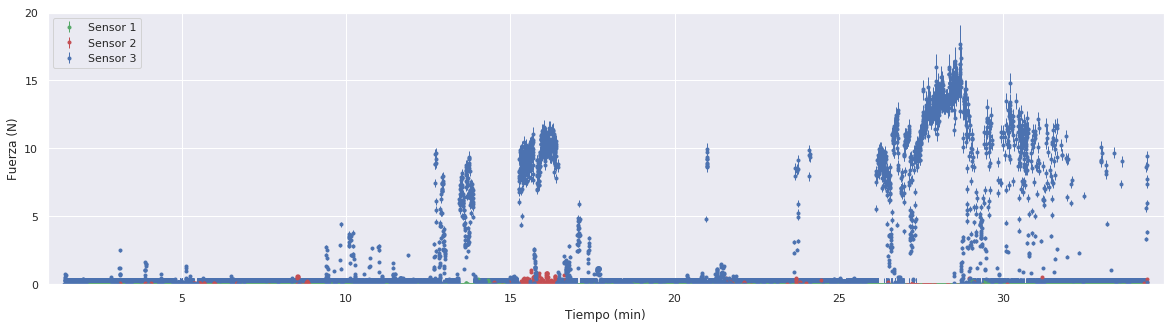

In [8]:
s1, par1, cov1 = miercoles_t2[:,1]*5/1023, parametros[2], covarianza[2]
s2, par2, cov2 = miercoles_t2[:,2]*5/1023, parametros[5], covarianza[5]
s3, par3, cov3 = miercoles_t2[:,3]*5/1023, parametros[8], covarianza[8]

L1, U1 = prediccion(par1,cov1)
F_medio1, F_inf1, F_sup1, inf_sup1 = conversion(s1,L1,U1,par1)

L2, U2 = prediccion(par2,cov2)
F_medio2, F_inf2, F_sup2, inf_sup2 = conversion(s2,L2,U2,par2)

L3, U3 = prediccion(par3,cov3)
F_medio3, F_inf3, F_sup3, inf_sup3 = conversion(s3,L3,U3,par3)

plt.figure(figsize=(20,5))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


#plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='ro--',label='Fuerza Vernier')

#plt.errorbar(miercoles_t2[:,0]/1000,F_medio1,yerr=inf_sup1,fmt='b.',linewidth=1,label='S1 Señal calibrada')
#plt.errorbar(miercoles_t2[:,0]/1000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='S2 Señal calibrada')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio1,yerr=inf_sup1,fmt='g.',linewidth=1,label='Sensor 1')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='Sensor 2')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio3,yerr=inf_sup3,fmt='b.',linewidth=1,label='Sensor 3')
plt.axvline(300)

#plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,1]*5/1023, 'c.')
#plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,2]*20/1023, '.', color='orange')
#plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,3]*20/1023, 'y.')

#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (min)')
plt.ylabel('Fuerza (N)')
plt.xlim(miercoles_t2[0,0]/60000-0.5,miercoles_t2[-1,0]/60000+0.5)
plt.ylim(0,20)
plt.grid()
plt.legend(loc='upper left')
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=20)
plt.grid()
#plt.savefig('miercoles_mañana.png')

In [0]:
len(martes_t2[:,2])

2289

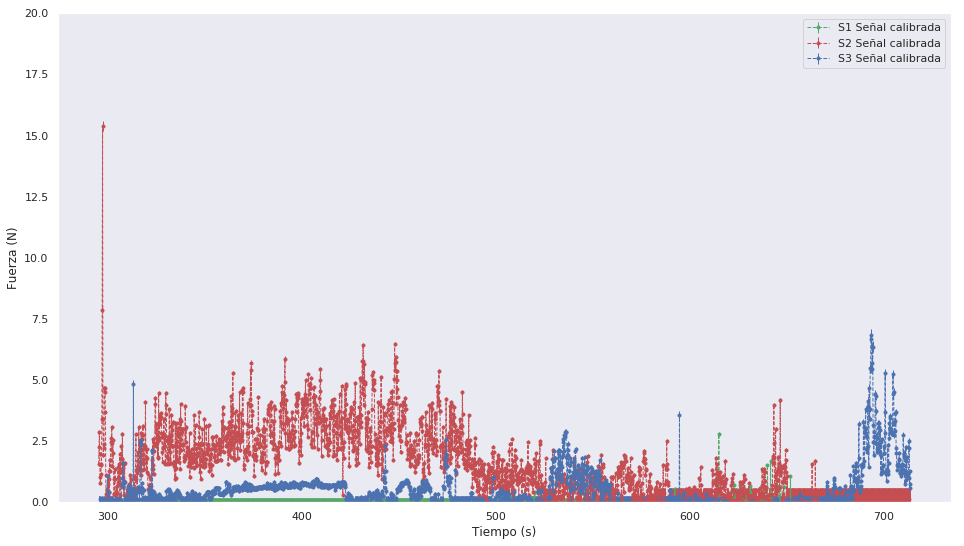

In [0]:
s1, par1, cov1 = martes_t2[:,1]*5/1023, parametros[0], covarianza[0]
s2, par2, cov2 = martes_t2[:,2]*5/1023, parametros[3], covarianza[3]
s3, par3, cov3 = martes_t2[:,3]*5/1023, parametros[6], covarianza[6]

L1, U1 = prediccion(par1,cov1)
F_medio1, F_inf1, F_sup1, inf_sup1 = conversion(s1,L1,U1,par1)

L2, U2 = prediccion(par2,cov2)
F_medio2, F_inf2, F_sup2, inf_sup2 = conversion(s2,L2,U2,par2)

L3, U3 = prediccion(par3,cov3)
F_medio3, F_inf3, F_sup3, inf_sup3 = conversion(s3,L3,U3,par3)

plt.figure(figsize=(16,9))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


#plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='ro--',label='Fuerza Vernier')

plt.errorbar(martes_t2[:,0]/1000,F_medio1,yerr=inf_sup1,fmt='g.--',linewidth=1,label='S1 Señal calibrada')
plt.errorbar(martes_t2[:,0]/1000,F_medio2,yerr=inf_sup2,fmt='r.--',linewidth=1,label='S2 Señal calibrada')
plt.errorbar(martes_t2[:,0]/1000,F_medio3,yerr=inf_sup3,fmt='b.--',linewidth=1,label='S3 Señal calibrada')
"""
plt.plot(martes_t2[:,0]/1000,F_medio1, 'b.')
plt.plot(martes_t2[:,0]/1000,F_medio2, 'r.')
plt.plot(martes_t2[:,0]/1000,F_medio3, 'g.')

plt.plot(martes_t2[:,0]/1000, martes_t2[:,1]*5/1023, 'b.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,2]*5/1023, 'r.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,3]*5/1023, 'g.')
"""

#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Fuerza (N)')
plt.ylim(0,20)
plt.grid()
plt.legend()
#plt.savefig('prueba_cal_S2.png')

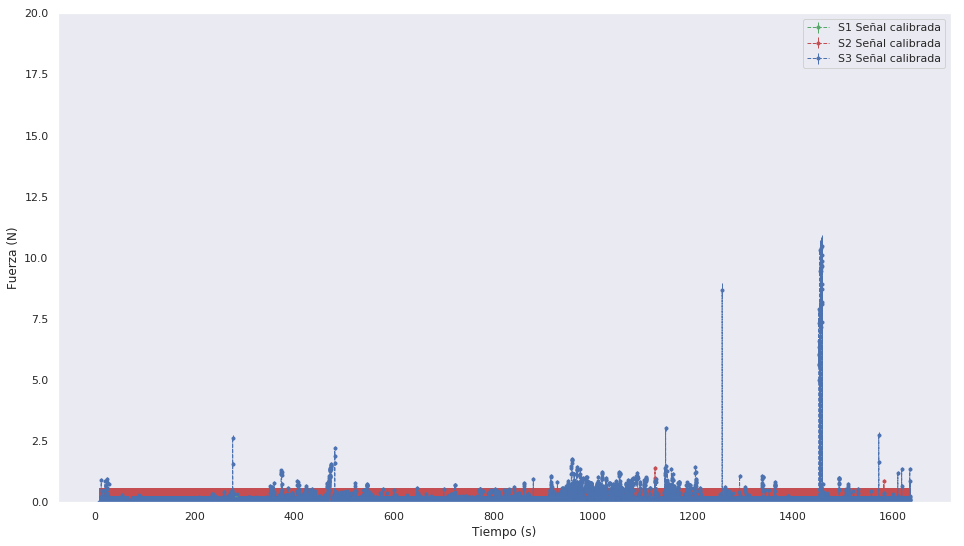

In [0]:
s1, par1, cov1 = otras2[:,1]*5/1023, parametros[0], covarianza[0]
s2, par2, cov2 = otras2[:,2]*5/1023, parametros[3], covarianza[3]
s3, par3, cov3 = otras2[:,3]*5/1023, parametros[6], covarianza[6]

L1, U1 = prediccion(par1,cov1)
F_medio1, F_inf1, F_sup1, inf_sup1 = conversion(s1,L1,U1,par1)

L2, U2 = prediccion(par2,cov2)
F_medio2, F_inf2, F_sup2, inf_sup2 = conversion(s2,L2,U2,par2)

L3, U3 = prediccion(par3,cov3)
F_medio3, F_inf3, F_sup3, inf_sup3 = conversion(s3,L3,U3,par3)

plt.figure(figsize=(16,9))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


#plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='ro--',label='Fuerza Vernier')

plt.errorbar(otras2[:,0]/1000,F_medio1,yerr=inf_sup1,fmt='g.--',linewidth=1,label='S1 Señal calibrada')
plt.errorbar(otras2[:,0]/1000,F_medio2,yerr=inf_sup2,fmt='r.--',linewidth=1,label='S2 Señal calibrada')
plt.errorbar(otras2[:,0]/1000,F_medio3,yerr=inf_sup3,fmt='b.--',linewidth=1,label='S3 Señal calibrada')
"""
plt.plot(martes_t2[:,0]/1000,F_medio1, 'b.')
plt.plot(martes_t2[:,0]/1000,F_medio2, 'r.')
plt.plot(martes_t2[:,0]/1000,F_medio3, 'g.')

plt.plot(martes_t2[:,0]/1000, martes_t2[:,1]*5/1023, 'b.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,2]*5/1023, 'r.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,3]*5/1023, 'g.')
"""

#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Fuerza (N)')
plt.ylim(0,20)
plt.grid()
plt.legend()
#plt.savefig('prueba_cal_S2.png')

In [0]:
def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x 

In [0]:
inversa(2,par1[0], par1[1], par1[2])

4.607928607951207

In [0]:
conversion([2,4,5,3,2,1,4,3], L1, U2, par1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


([4.607928607951207,
  19.6455192230347,
  nan,
  9.079345159745136,
  4.607928607951207,
  1.7292294082153539,
  19.6455192230347,
  9.079345159745136],
 [3.2, 15.610000000000001, 50, 7.025, 3.2, 0.685, 15.610000000000001, 7.025],
 [4.695, 19.95, 1000, 9.215, 4.695, 1.795, 19.95, 9.215],
 array([[1.40792861, 4.03551922,        nan, 2.05434516, 1.40792861,
         1.04422941, 4.03551922, 2.05434516],
        [0.08707139, 0.30448078,        nan, 0.13565484, 0.08707139,
         0.06577059, 0.30448078, 0.13565484]]))

In [0]:
#data0.head() #imprime las primeras 5 filas
#data0.tail() #imprime las ultimas 5 filas
#data0.sample(6) #imprime 6 filas random
#data0['tiempo'] #imprime la columna con el head 'tiempo'
#data0.tiempo #idem anterior
#data0.index[data0.isnull().tiempo] #detecta lineas vacias
#eval('nombre') #evalua la variable que se llame nombre

In [0]:
1/N  * np.sqrt(sum(errores**2))

In [0]:
def sliding_mean(data_array, window, error_sup):
#    data_array = array(data_array)
    new_list = []
    err_filtrado =[]
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        err = 0
        for j in indices:
            avg += data_array[j]
            err += error_sup[j]**2
            
        avg /= float(len(indices))
        err_prop = np.sqrt(err) / float(len(indices))
        new_list.append(avg)
        err_filtrado.append(err_prop)
    
       
    return new_list, err_filtrado

  
def sliding_mean_sin_error(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list
#mydata_smooth=sliding_mean(mydata[:,0],10) #para invocar la función

In [0]:
plt.errorbar(miercoles_t2[:,0]/60000,F_medio1,yerr=inf_sup1,fmt='g.',linewidth=1,label='Sensor 1')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='Sensor 2')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio3,yerr=inf_sup3,fmt='b.',linewidth=1,label='Sensor 3')

In [0]:
ventana = 30
s1_filt, errs1 = sliding_mean(F_medio1, ventana, inf_sup1[1])
s2_filt, errs2  = sliding_mean(F_medio2, ventana, inf_sup1[1])
s3_filt, errs3 = sliding_mean(F_medio3, ventana, inf_sup1[1])
tiempo_filt = sliding_mean_sin_error(miercoles_t2[:,0]/60000, ventana)

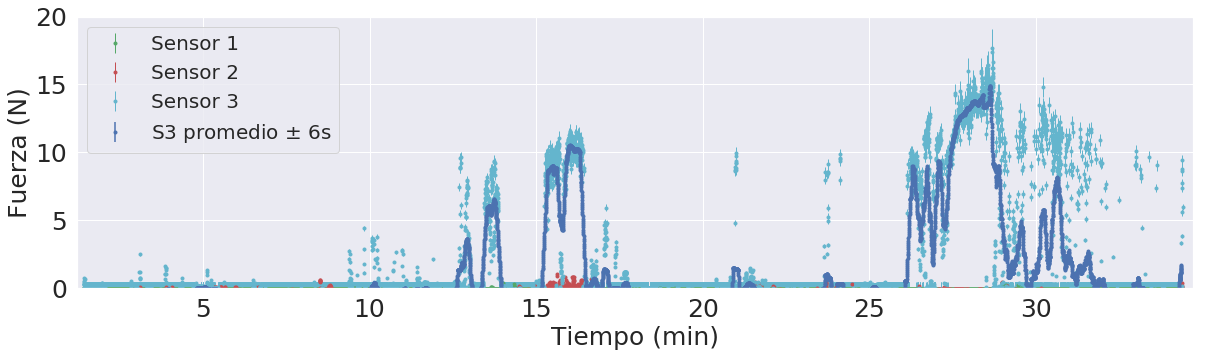

In [13]:
plt.figure(figsize=(20,5))

plt.errorbar(miercoles_t2[:,0]/60000,F_medio1,yerr=inf_sup1,fmt='g.',linewidth=1,label='Sensor 1')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='Sensor 2')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio3,yerr=inf_sup3,fmt='c.',linewidth=1,label='Sensor 3')

#plt.errorbar(tiempo_filt, s1_filt, yerr=errs1, fmt='g.', label='S1 promedio')
#plt.errorbar(tiempo_filt, s2_filt, yerr=errs2, fmt='r.', label='S2 promedio')
plt.errorbar(tiempo_filt, s3_filt, yerr=errs3, fmt='b.', label='S3 promedio $\pm$ 6s')
plt.grid()
plt.xlabel('Tiempo (min)')
plt.ylabel('Fuerza (N)')
plt.legend()

#plt.title('Datos filtrados de los sensores')
plt.grid()
plt.xlim(miercoles_t2[0,0]/60000-0.2,miercoles_t2[-1,0]/60000+0.3)
plt.ylim(0,20)
#plt.savefig('crudos_proms.png')
plt.show()

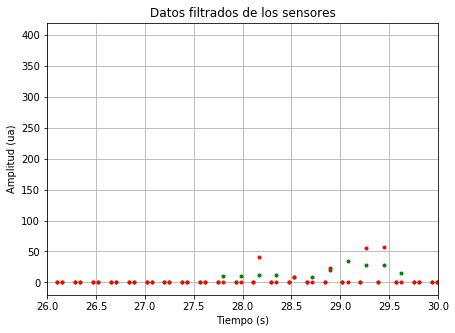

In [0]:
plt.figure(figsize=(7,5))
plt.plot(data0.tiempo/1000, filtro_s1, '.g')
plt.plot(data0.tiempo/1000, data0.s1, '.r')
#plt.plot(data0.tiempo, filtro_s2, '.b')
#plt.plot(data0.tiempo, filtro_s3, '.g')
#plt.plot(data0.tiempo, filtro_s4, '.y')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (ua)')
plt.title('Datos filtrados de los sensores')
plt.xlim(26, 30)
plt.grid()
plt.show()

In [0]:
#busco indices donde para de medir para cada masa
"""
empty=[]

for i in range(4):
  empty.append([0]+list(eval('data'+str(i)).index[eval('data'+str(i)).isnull().tiempo]))

print(empty)
"""

"\nempty=[]\n\nfor i in range(4):\n  empty.append([0]+list(eval('data'+str(i)).index[eval('data'+str(i)).isnull().tiempo]))\n\nprint(empty)\n"

In [0]:
"""
for i in range(3):
  
  promedio=[]
  for j in range(len(empty[i])-1):
    promedio.append(np.mean(eval('data'+str(i)).lectura[empty[i][j]:empty[i][j+1]]))

  means.append(promedio)
  masas.append(masa[i]*np.ones(len(promedio)))
"""

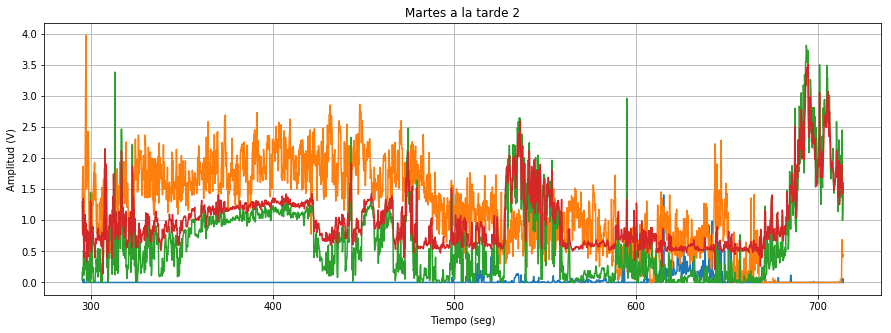

In [0]:
plt.figure(figsize=(15,5))
for i in range(4):
  plt.plot(martes_t2[:,0]/1000, martes_t2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 2')
  #plt.xlim(300,500)

 
plt.grid()
plt.show()

In [0]:
parametros=[[0.2567413988351364, -0.5027925403912138, 0.12306860893280448],
 [0.5994626005078386, -0.5552524341046066, 0.1459786848992154],
 [0.5916142259901637, -0.9218208751408562, 0.24568312094336148],
 [0.22535422081340992, -0.5417281995840768, 0.13266908030153945],
 [0.2089022897582426, -0.596243662889203, 0.142933668263071],
 [0.9243147648912522, -0.6950234790444985, 0.20123586066032564]]

In [0]:
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/k)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

  
def prediccion_pol(x,error_x,params,cov_params):
    df=df_pol(x,params)
    Y=params[0]*x**4+params[1]*x**3+params[2]*x**2+params[3]*x
    sigma_Y=np.sqrt((df[0]**2)*cov_params[0,0]+(df[1]**2)*cov_params[1,1]
                    +((df[2]**2)*cov_params[2,2])+((df[3]**2)*cov_params[3,3])
                   +2*df[0]*df[1]*cov_params[0,1]+2*df[0]*df[2]*cov_params[0,2]
                    +2*df[0]*df[3]*cov_params[0,3]+2*df[1]*df[2]*cov_params[1,2]
                   +2*df[1]*df[3]*cov_params[1,3]+2*df[2]*df[3]*cov_params[2,3])
    return(Y,sigma_Y)
